# Dalle

In [1]:
import os
import openai
import tiktoken
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

In [2]:
if 0:
    response = openai.Image.create(
      prompt="body builders men with very muscular thighs with ghost hoods on,  holding cups of teas",
      n=4,
      size="1024x1024"
    )
    image_url = response['data'][0]['url']
    for x in response['data']:
        print(x['url'])

# Transofrmers stable diffusion

In [3]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")


2023-06-27 14:29:37.774871: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 14:29:39.754824: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-27 14:29:39.754973: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-27 14:29:39.754990: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [4]:
from skimage import io
import matplotlib.pyplot as plt 

In [8]:
%%capture
prompt = "hippo in professors clothes"

images = []
for i in range(16):
    image = pipe(prompt).images[0]
    images.append(image)

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


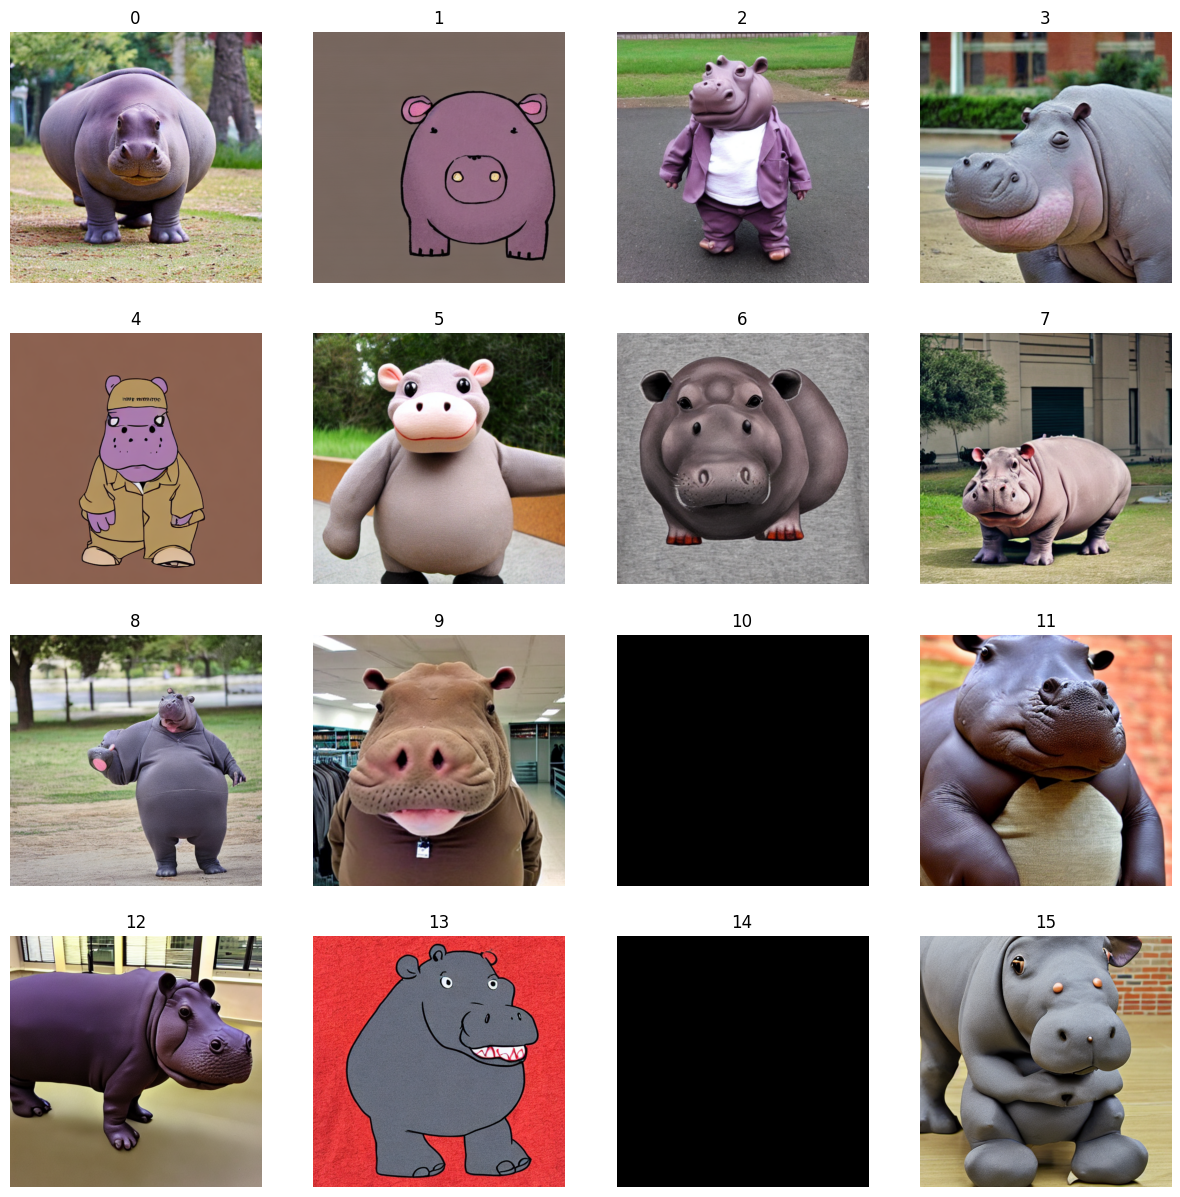

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
    
for i, image in enumerate(images):
    row = i // 4
    col = i % 4
    axes[row, col].imshow(image)
    axes[row, col].axis('off')
    axes[row, col].set_title(i)

plt.show()

In [7]:
images[0].save('bodybuilder.png')